In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from numpy import mean
from pandas_profiling import ProfileReport
from matplotlib.pyplot import figure

%run utils.ipynb
%run predict.ipynb

figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')

# We get the full dataset (train + test) at the same time
df = pd.read_csv('./data/full_dataset.csv')

# We update Survived values for test set to 2
df.loc[df['Survived']!=df['Survived'], 'Survived']=2

# We are also going to add a column "Probability" we will use to predict manually chances to survive
df['Probability'] = df['Survived']
df.loc[df['Survived']<=2, 'Probability']=0

# We define the size of each dataset pro-actively
train_size = len(df.query('Survived<2'))
test_size = len(df.query('Survived==2'))
full_size = len(df)
test_percentage = test_size/full_size

# Before everything we count the number of missing values in the dataframe for each type
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Figure size 1600x1280 with 0 Axes>

In [2]:
# It seems like Age and Cabin have a lot of missing data, let's put more numbers into that
print('{}% of Age content is missing'.format((df['Age'].isnull().sum()/len(df))*100))
print('{}% of Cabin content is missing'.format((df['Cabin'].isnull().sum()/len(df))*100))
print('{}% of Embarked content is missing'.format((df['Embarked'].isnull().sum()/len(df))*100))

20.091673032849503% of Age content is missing
77.46371275783041% of Cabin content is missing
0.15278838808250572% of Embarked content is missing


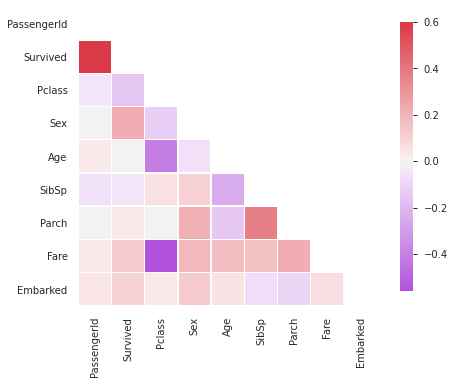

In [3]:
# EACH DETAIL COUNTS, so We won't drop any column at all

# We start by numerizing what we can
df = numerize_sex(df)
df = numerize_embarked(df)

# What are the correlations with survivals we can spot from the early beginnings?
correlation_graph(df)

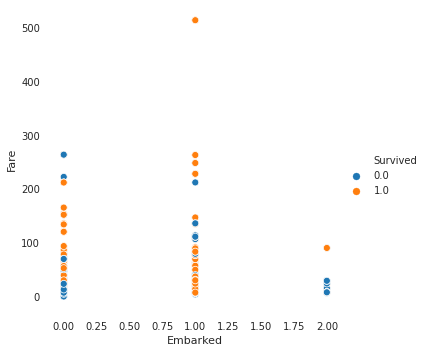

In [28]:
# Response: Embarked, Fare, Parent-Children and Sex

# FIRST THING TO DO is to spot all the 100% correlation we can from the early beginning
# Logically, if we compare the price of ticket to embarkment place, we will reveal higher correlations

# 0 = Southampton, 1: Cherbourg, 2: Queenston, 3: Unknown
ax = sns.relplot(x='Embarked', y='Fare', hue='Survived', data=df.query('Survived<2'))

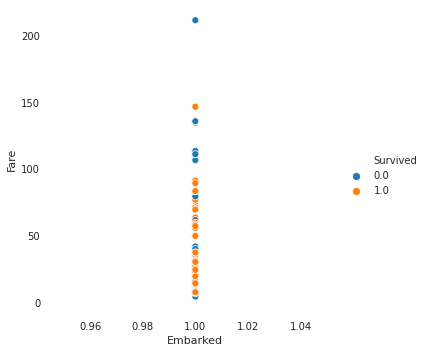

In [35]:
# From 79 to 220, 100% of passengers who embarked from Southampton survived
df.loc[(df['Embarked']==0) & (df['Fare']>=79) & (df['Fare']<220), 'Probability']=1
# Above 220, 100% of passengers who embarked from Cherbourg survived
df.loc[(df['Embarked']==1) & (df['Fare']>=220), 'Probability']=1
# Above 80, 100% of passengers who embarked from Queeston survived
df.loc[(df['Embarked']==2) & (df['Fare']>=80), 'Probability']=1


# We can display the same graph per port, with exclusion parameters
# Let's start with the easiest one, Cherbourg
ax = sns.relplot(x='Embarked', y='Fare', hue='Survived', data=df.query('Survived<2 & Embarked==1 & Fare<220'))

Males who embarked from Cherbourg, paid more than 100 and survived


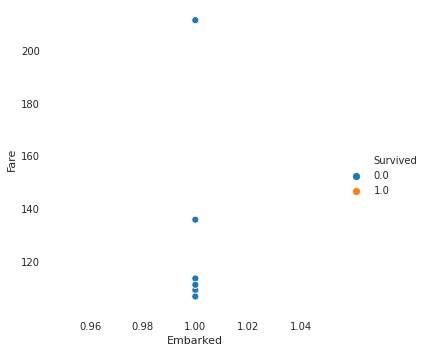

Females who embarked from Cherbourg, paid more than 100 and survived


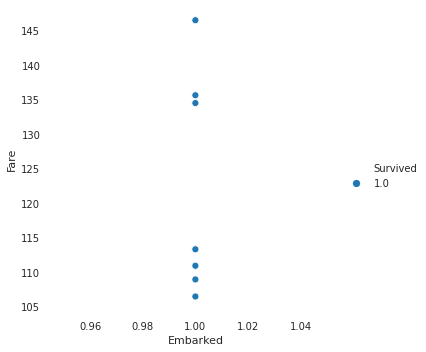

In [48]:
############################################################################# 
# FILTER ABOVE 100 - MALES AND FEMALES FROM CHERBOURG WHO PAID MORE THAN 100
############################################################################

# Males
print('Males who embarked from Cherbourg, paid more than 100 and survived')
ax = sns.relplot(x='Embarked', y='Fare', hue='Survived', data=df.query('Survived<2 & Embarked==1 & Fare>100 & Fare<220 & Sex==0'))
plt.show()

# Females
print('Females who embarked from Cherbourg, paid more than 100 and survived')
ax = sns.relplot(x='Embarked', y='Fare', hue='Survived', data=df.query('Survived<2 & Embarked==1 & Fare>100 & Fare<220 & Sex==1'))
plt.show()

In [ ]:
# 100% of women who embarked from Cherbourg and paid more than 100 for their ticket survived
df.loc[(df['Embarked']==1) & (df['Fare']>=100 & (df['Fare']>220) & (df['Sex']==1), 'Probability']=1

Males who embarked from Cherbourg, paid less than 100 and survived


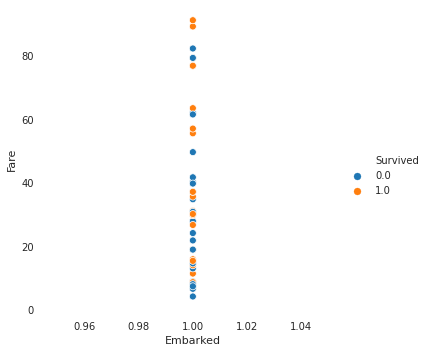

Females who embarked from Cherbourg, paid less than 100 and survived


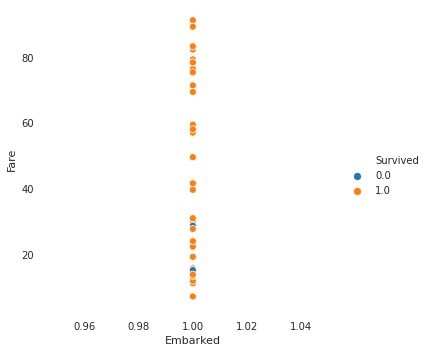

In [49]:
############################################################################# 
# FILTER BELOW 100 - MALES AND FEMALES FROM CHERBOURG WHO PAID LESS THAN 100
############################################################################

# Males
print('Males who embarked from Cherbourg, paid less than 100 and survive')
ax = sns.relplot(x='Embarked', y='Fare', hue='Survived', data=df.query('Survived<2 & Embarked==1 & Fare<100 & Sex==0'))
plt.show()

# Females
print('Females who embarked from Cherbourg, paid less than 100 and survive')
ax = sns.relplot(x='Embarked', y='Fare', hue='Survived', data=df.query('Survived<2 & Embarked==1 & Fare<100 & Sex==1'))
plt.show()

In [58]:
# It is much more easier to filter females who did not survive, and check their precised category
# Let's see who are they
print(df.query('Survived==0 & Embarked==1 & Fare<100 & Sex==1'))

     PassengerId  Survived  Pclass                              Name  Sex  \
111          112       0.0       3              Zabour, Miss. Hileni    1   
114          115       0.0       3             Attalah, Miss. Malake    1   
140          141       0.0       3     Boulos, Mrs. Joseph (Sultana)    1   
177          178       0.0       1        Isham, Miss. Ann Elizabeth    1   
240          241       0.0       3             Zabour, Miss. Thamine    1   
362          363       0.0       3   Barbara, Mrs. (Catherine David)    1   
578          579       0.0       3  Caram, Mrs. Joseph (Maria Elias)    1   
702          703       0.0       3             Barbara, Miss. Saiide    1   
852          853       0.0       3           Boulos, Miss. Nourelain    1   

      Age  SibSp  Parch    Ticket     Fare Cabin  Embarked  Probability  
111  14.5      1      0      2665  14.4542   NaN       1.0          NaN  
114  17.0      0      0      2627  14.4583   NaN       1.0          NaN  
140   N

In [ ]:
# Women from third class who embarked from Cherbourg and paid less than 100 didn't make it, we can save those probabilities
# With the same criterias, those from higher class made it
df.loc[(df['Embarked']==1) & (df['Fare']<100 & (df['Sex']==1) & (df['Pclass']<3), 'Probability']=1

In [63]:
# We can focus on men and spot visually obvious categories
print("Those who died")
print(df.query('Survived==0 & Embarked==1 & Fare<100 & Sex==0'))
print("Those who survived")
print(df.query('Survived==1 & Embarked==1 & Fare<100 & Sex==0'))

Those who died
     PassengerId  Survived  Pclass                                    Name  \
26            27       0.0       3                 Emir, Mr. Farred Chehab   
30            31       0.0       1                Uruchurtu, Don. Manuel E   
34            35       0.0       1                 Meyer, Mr. Edgar Joseph   
42            43       0.0       3                     Kraeff, Mr. Theodor   
48            49       0.0       3                     Samaan, Mr. Youssef   
54            55       0.0       1          Ostby, Mr. Engelhart Cornelius   
57            58       0.0       3                     Novel, Mr. Mansouer   
60            61       0.0       3                   Sirayanian, Mr. Orsen   
64            65       0.0       1                   Stewart, Mr. Albert A   
73            74       0.0       3             Chronopoulos, Mr. Apostolos   
96            97       0.0       1               Goldschmidt, Mr. George B   
122          123       0.0       2               

In [99]:
# Difficult to spot obvious correlations, we need to split data further
df = create_familysize_category(df)
df = create_title_category(df)

print("Those from first class who embarked from Cherbourg, paid less than 100 and died")
print(df.query('Survived==0 & Embarked==1 & Fare<100 & Sex==0 & Pclass==1')[['Survived', 'FamilySize', 'Title', 'Cabin', 'Fare', 'Age']])

print("Those from first class who embarked from Cherbourg, paid less than 100 and survived")
print(df.query('Survived==1 & Embarked==1 & Fare<100 & Sex==0 & Pclass==1')[['Survived', 'FamilySize', 'Title', 'Cabin', 'Fare', 'Age']])

# print('Men who embarked from Cherbourg, paid less than 100 and did not survive')
# ax = sns.relplot(x='Cabin', y='Fare', hue='Survived', data=df.query('Survived==0 & Embarked==1 & Fare<100 & Sex==0'))
# plt.show()

36.04023461538462
1.2307692307692308
Those from first class who embarked from Cherbourg, paid less than 100 and died
     Survived  FamilySize Title    Cabin     Fare   Age
30        0.0           0     6      NaN  27.7208  40.0
34        0.0           1     0      NaN  82.1708  28.0
54        0.0           1     0      B30  61.9792  65.0
64        0.0           0     0      NaN  27.7208   NaN
96        0.0           0     0       A5  34.6542  71.0
139       0.0           0     0      B86  79.2000  24.0
155       0.0           1     0      NaN  61.3792  51.0
174       0.0           0     0       A7  30.6958  56.0
273       0.0           1     0     C118  29.7000  37.0
295       0.0           0     0      NaN  27.7208   NaN
452       0.0           0     0     C111  27.7500  30.0
487       0.0           0     0      B37  29.7000  58.0
493       0.0           0     0      NaN  49.5042  71.0
583       0.0           0     0      A10  40.1250  36.0
766       0.0           0     4      NaN  3


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


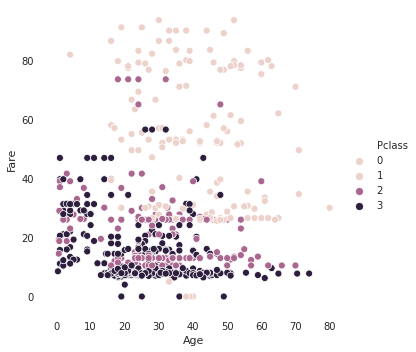

In [5]:
# PClass=0 does not exists, the library just labelled it
# What data tells us is above 100$ we only have passengers of first class, those we can classify as RICH
df = create_rich_category(df)

# Lets define other classes by comparing age and fares below 100
ax = sns.relplot(x='Age', y='Fare', hue='Pclass', data=df.query('Fare < 100'))

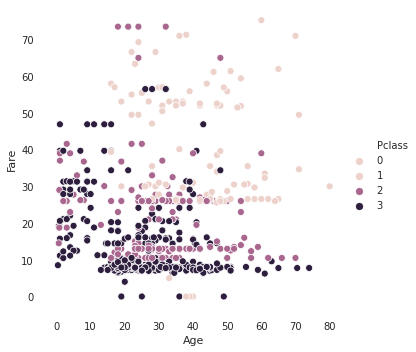

In [6]:
# We realize that from closed to 76 we still have rich people. We have to refine our category
df = update_rich_category(df)

# Lets define again other classes by comparing age and fares below 100
ax = sns.relplot(x='Age', y='Fare', hue='Pclass', data=df.query('Fare < 76'))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


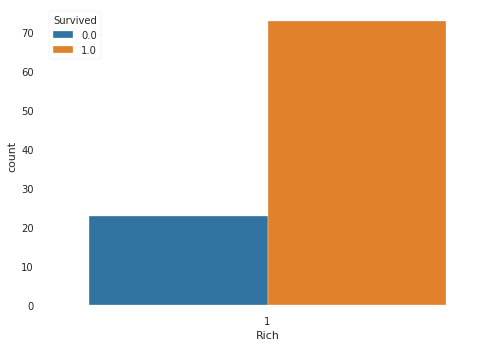

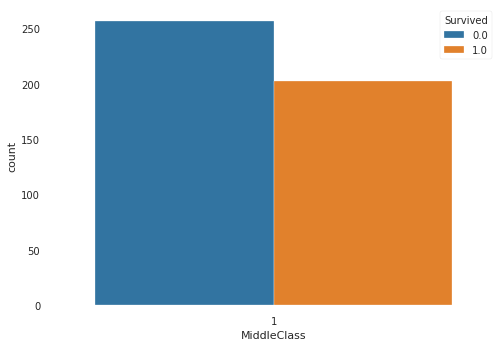

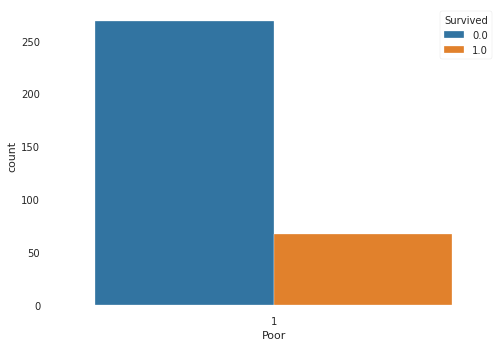

In [7]:
# Below 10 we can categorize those people as economically poor
df = create_poor_category(df)

# From 76 back to 10, we can considere those people as middle class
df = create_middleclass_category(df)

# I would like to see who survived amongst social layers
aa = sns.countplot(x='Rich', hue='Survived', data=df.query('Rich==1'))
plt.show()
ab = sns.countplot(x='MiddleClass', hue='Survived', data=df.query('MiddleClass==1'))
plt.show()
ac = sns.countplot(x='Poor', hue='Survived', data=df.query('Poor==1'))
plt.show()

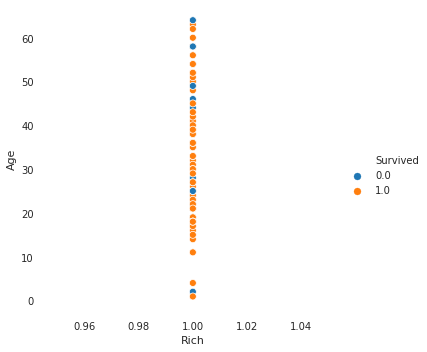

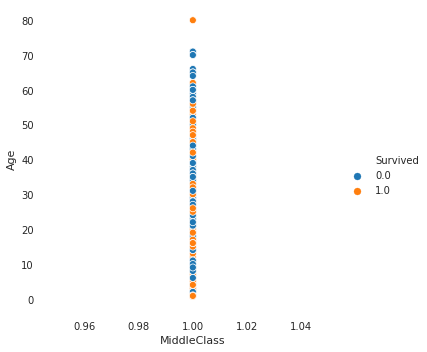

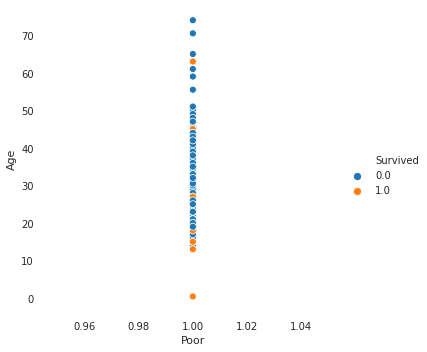

In [8]:
# Rich people have higher chances to survive than the middle class and poor dudes
# We spotted an hidden correlation, which is great
# Next step, we would like to see which age from each group has better chances to survive
ax = sns.relplot(x='Rich', y='Age', hue='Survived', data=df.query('Rich == 1'))
ax = sns.relplot(x='MiddleClass', y='Age', hue='Survived', data=df.query('MiddleClass == 1'))
ax = sns.relplot(x='Poor', y='Age', hue='Survived', data=df.query('Poor == 1'))

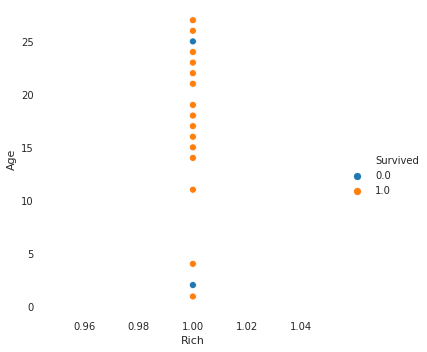

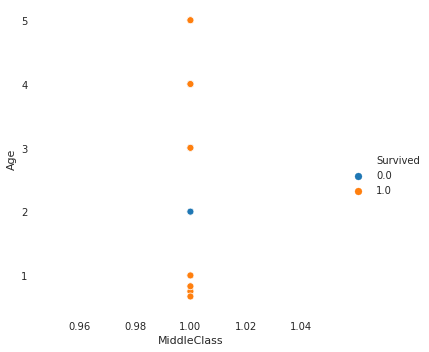

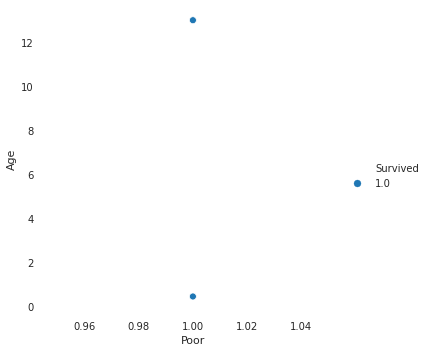

In [9]:
# Again, the poorer you are, the lower your chances to survive, but depending on your social rank, the survival age range varies a lot
# Lets confirm it
ax = sns.relplot(x='Rich', y='Age', hue='Survived', data=df.query('Rich == 1 & Age<28'))
ax = sns.relplot(x='MiddleClass', y='Age', hue='Survived', data=df.query('MiddleClass == 1 & Age<6'))
ax = sns.relplot(x='Poor', y='Age', hue='Survived', data=df.query('Poor == 1 & Age<14'))

In [10]:
# We create another category 'NaturalSelection', it looks like women and children first, lets confirm it
df = create_rich_age_selection(df)
df = create_middleclass_age_selection(df)
df = create_poor_age_selection(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Survival number by gender when Rich


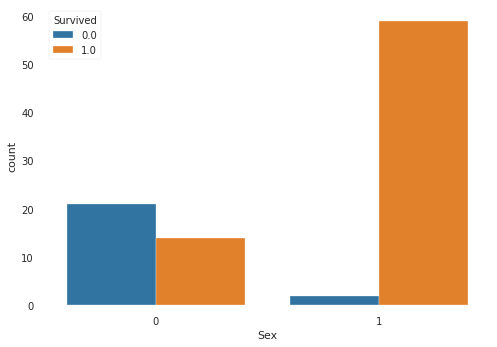

Survival number by gender when MiddleClass


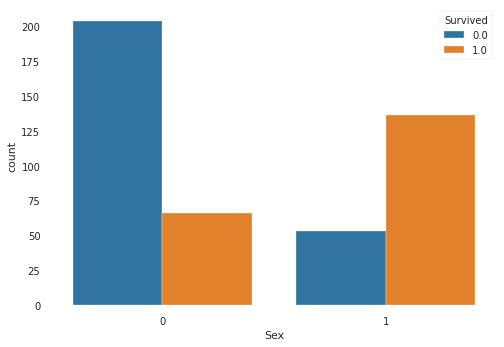

Survival number by gender when Poor


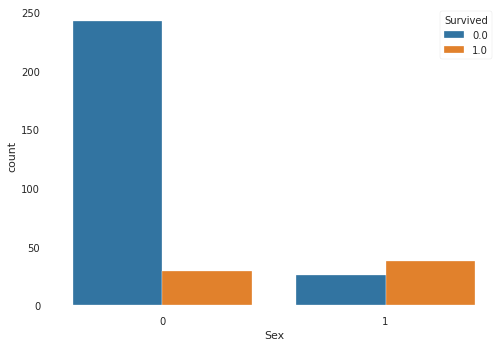

In [11]:
# Now, we want to know how many males and females survived in each social category
aa = sns.countplot(x='Sex', hue='Survived', data=df.query('Rich==1'))
print('Survival number by gender when Rich')
plt.show()
aa = sns.countplot(x='Sex', hue='Survived', data=df.query('MiddleClass==1'))
print('Survival number by gender when MiddleClass')
plt.show()
aa = sns.countplot(x='Sex', hue='Survived', data=df.query('Poor==1'))
print('Survival number by gender when Poor')
plt.show()

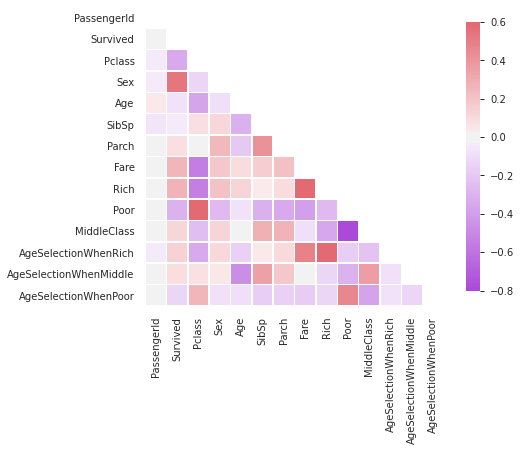

In [12]:
# Data tells us that if you are a rich woman, you have greater chances to survive than all other categories
# But we can not really deal with this data, as it is not significant enough for accuracy
# Let's plot a correlation graph again, to see what we are probably missing
correlation_graph(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Rich FamilySize that survived


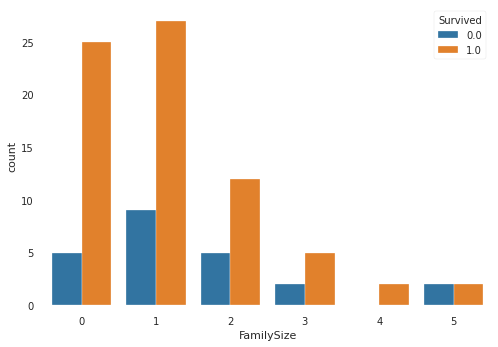

MiddleClass FamilySize that survived


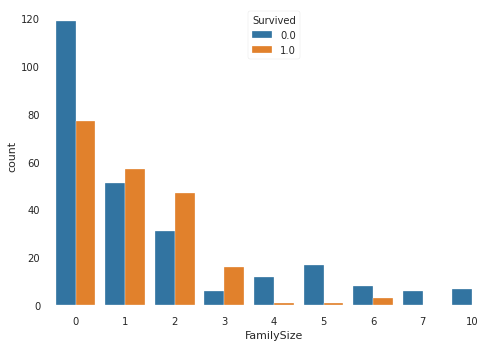

Poor FamilySize that survived


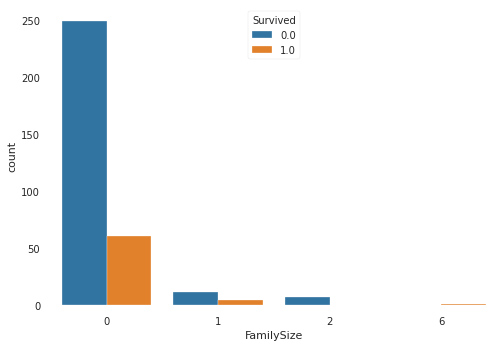

In [13]:
# Here, I just look at the column 'Survived' on x axis, and strangely I see low correlaton with Poor people and AgeSelectionWhenPoor
# that is because your age won't help you much to survive when you are poor
# We then need a new way to categorize them
# Parent-Children, Sibling-Spouse are all members of a same family
# Since those are just numbers, we can create a new column "FamilySize"
df = create_familysize_category(df)

# Alright, now we want to see for each social category, which familySize has better chance to survive
aa = sns.countplot(x='FamilySize', hue='Survived', data=df.query('Rich==1'))
print('Rich FamilySize that survived')
plt.show()
aa = sns.countplot(x='FamilySize', hue='Survived', data=df.query('MiddleClass==1'))
print('MiddleClass FamilySize that survived')
plt.show()
aa = sns.countplot(x='FamilySize', hue='Survived', data=df.query('Poor==1'))
print('Poor FamilySize that survived')
plt.show()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


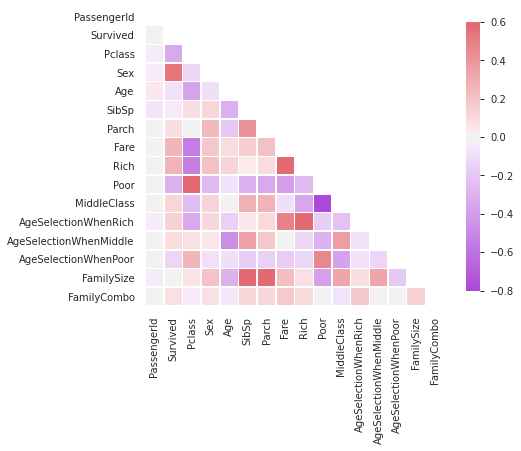

In [14]:
# Data tells us we have a 100% survival ratio when you are part of:
#  - rich family composed of 4 members
#  - poor family composed of 6 members
df = create_familycombo_category(df)

# Let's plot our correlation chart again and see what's going on
correlation_graph(df)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


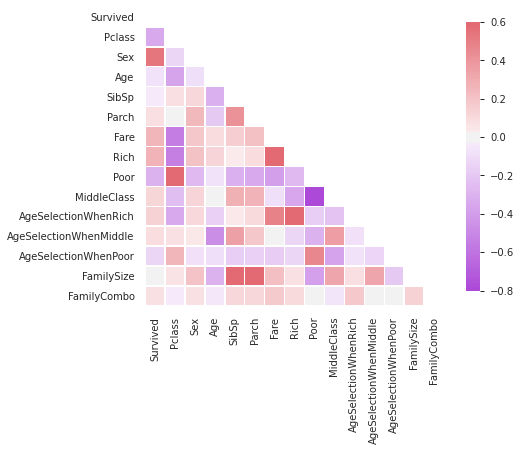

In [15]:
# We can see that familyCombo has a good correlation with Survived, compared to familySize
# therefore we can already remove PassengerId,Pclass columns as they get few correlation with Survived passengers
df = drop_passengerid_and_class(df)

correlation_graph(df)

In [16]:
# GREAT !!! But at this point, we still have no way to categorize which type of men and women survived
# We need this for better accuracy
# Best way to categorize it is to extract titles from column Name, it is an ant work, lets do it
df = create_title_category(df)

print(df['Title'].values)

[ 0  3  2  3  0  0  0  1  3  3  2  2  0  0  2  3  1  0  3  3  0  0  2  0
  2  3  0  0  2  0  6  3  2  0  0  0  0  0  2  2  3  3  0  2  2  0  0  2
  0  3  1  0  3  3  0  0  2  0  2  1  0  2  0  1  0  1  3  0  2  0  0  2
  0  0  0  0  0  0  1  2  0  0  2  0  2  3  0  0  2  0  0  0  0  0  0  0
  0  0  3  0  2  0  0  0  0  0  2  0  0  2  0  2  0  2  2  0  0  0  0  2
  0  0  0  2  0  1  0  0  2  0  0  0  3  3  0  0  2  0  0  0  3  2  3  0
  0  0  0  2  0  5  5  3  0  0  0  0  2  0  0  1  0  3  0  0  1  1  3  3
  0  0  0  1  2  0  0  0  1  2  0  0  2  0  1  1  2  0  3  0  0  0  3  0
  2  1  3  2  0  0  2  2  0  0  0  0  0  2  0  0  2  0  0  2  0  0  0  2
  2  0  2  0  0  0  0  0  0  0  0  0  0  2  3  0  0  2  0  2  0  2  0  0
  2  2  0  0  0  4  2  3  0  5  0  3  0  0  3  3  3  2  2  3  0  1  0  0
  2  0  0  0  3  2  0  0  3  0  2  2  2  0  1  3  0  0  0  0  0  0  0  0
  0  2  2  3  0  2  0  0  0  2  0  3  2  0  0  2  0  1  2  3  0  2  2  2
  3  0  0  2  3  4  2  3  0  0  2  3  0  2  0  3  3


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Titles that survived within rich people


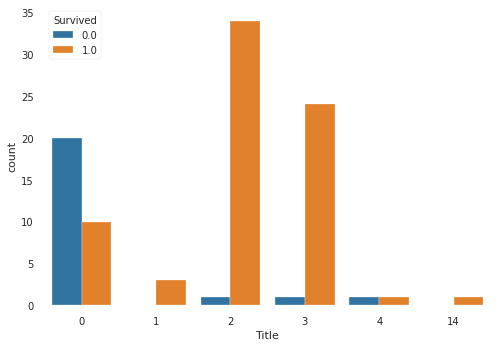

Titles that survived within middle class


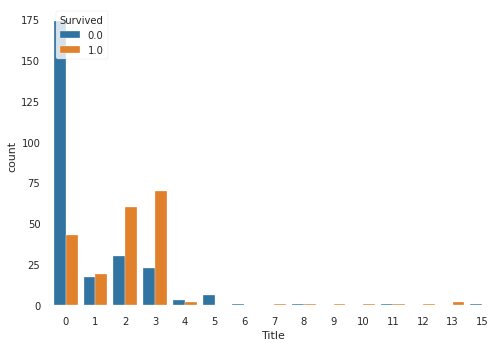

Titles that survived within poor people


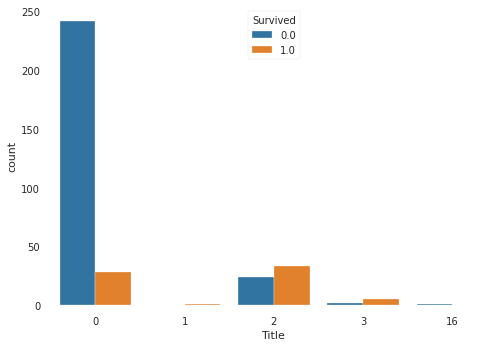

In [17]:
# Brilliant! Now all the titles have been extracted, lets define the titles with the highest chances to survive per social layer
aa = sns.countplot(x='Title', hue='Survived', data=df.query('Rich==1'))
print('Titles that survived within rich people')
plt.show()
aa = sns.countplot(x='Title', hue='Survived', data=df.query('MiddleClass==1'))
print('Titles that survived within middle class')
plt.show()
aa = sns.countplot(x='Title', hue='Survived', data=df.query('Poor==1'))
print('Titles that survived within poor people')
plt.show()

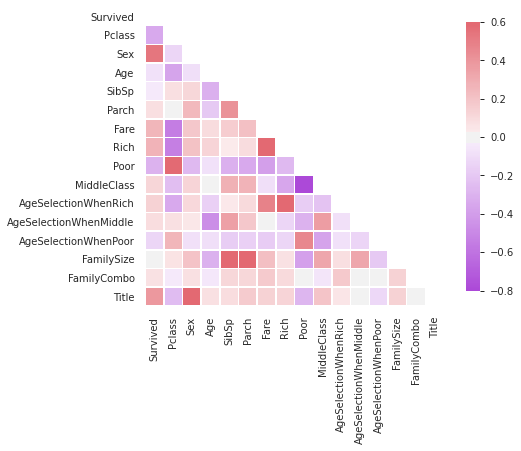

In [18]:
# Before doing anything else, let's see what our correlation grapth tells us
correlation_graph(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Rich passengers + Embarked VS survived


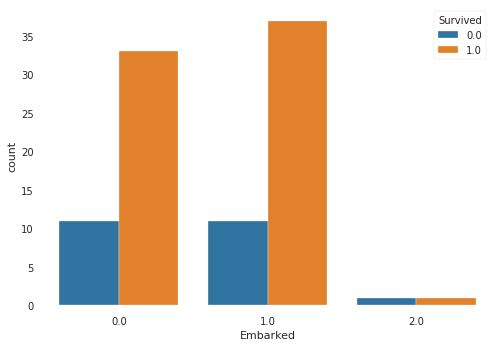

Middle class passengers + Embarked VS survived


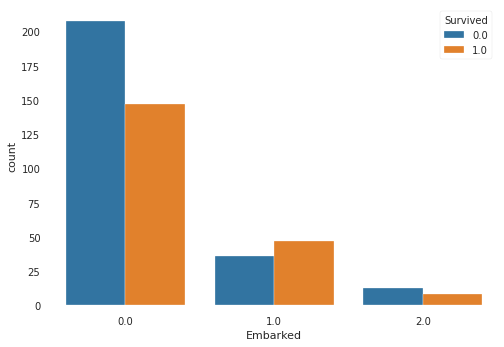

Poor passengers + Embarked VS survived


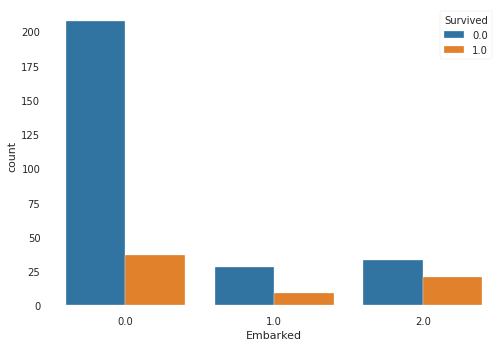

In [19]:
# There is a very high correlation between passengers title and their chance of surviving
# Now let's explore the rest of data to chase some correlations
# We start from where passengers embarked and we compare their survival rate per social layer

# Before we convert the Embarked feature
df = numerize_embarked(df)

aa = sns.countplot(x='Embarked', hue='Survived', data=df.query('Rich==1'))
print('Rich passengers + Embarked VS survived')
plt.show()

aa = sns.countplot(x='Embarked', hue='Survived', data=df.query('MiddleClass==1'))
print('Middle class passengers + Embarked VS survived')
plt.show()

aa = sns.countplot(x='Embarked', hue='Survived', data=df.query('Poor==1'))
print('Poor passengers + Embarked VS survived')
plt.show()

Rich passengers who embarked from Southampton + Title VS survived


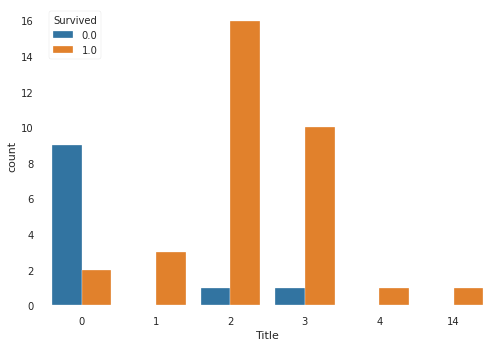

Rich passengers who embarked from Cherbourg + Title VS survived


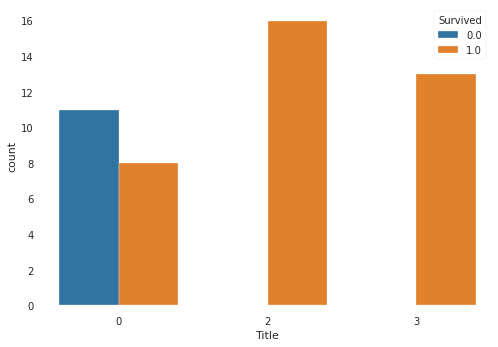

Middle class passengers who embarked from Southampton + Title VS survived


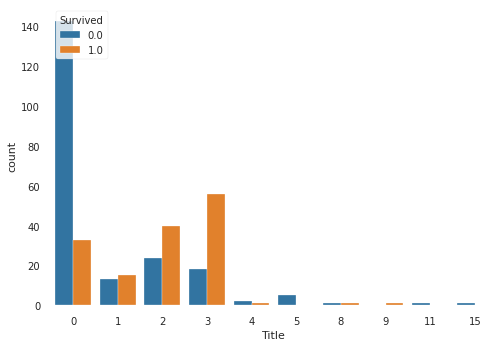

Middle class passengers who embarked from Cherbourg + Title VS survived


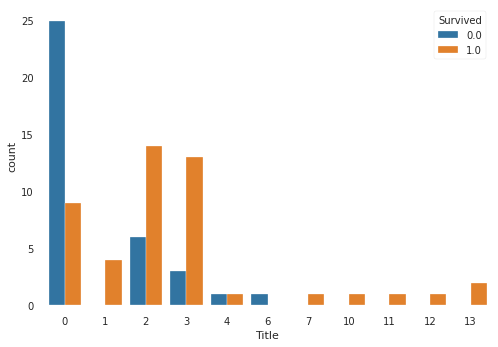

Poor passengers who embarked from Southampton + Title VS survived


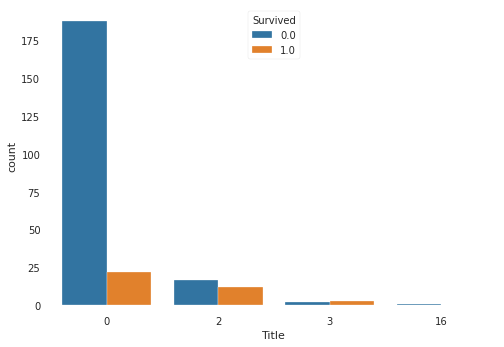

Poor passengers who embarked from Cherbourg + Title VS survived


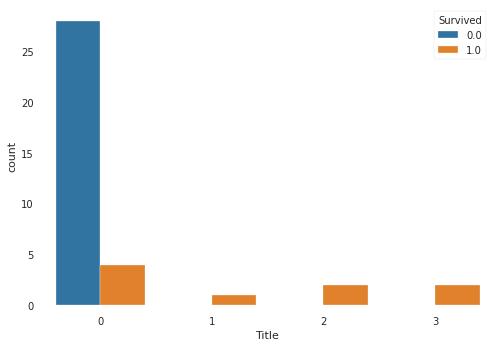

In [20]:
# Passengers who embarked from Souhtampton seem to have higher chances of survive
# Cherbourg and Southampton have higher chances give the best chances of surviving
# To grab some significance, let's filter by genger
aa = sns.countplot(x='Title', hue='Survived', data=df.query('Rich==1 & Embarked==0'))
print('Rich passengers who embarked from Southampton + Title VS survived')
plt.show()
aa = sns.countplot(x='Title', hue='Survived', data=df.query('Rich==1 & Embarked==1'))
print('Rich passengers who embarked from Cherbourg + Title VS survived')
plt.show()

aa = sns.countplot(x='Title', hue='Survived', data=df.query('MiddleClass==1 & Embarked==0'))
print('Middle class passengers who embarked from Southampton + Title VS survived')
plt.show()
aa = sns.countplot(x='Title', hue='Survived', data=df.query('MiddleClass==1 & Embarked==1'))
print('Middle class passengers who embarked from Cherbourg + Title VS survived')
plt.show()

aa = sns.countplot(x='Title', hue='Survived', data=df.query('Poor==1 & Embarked==0'))
print('Poor passengers who embarked from Southampton + Title VS survived')
plt.show()
aa = sns.countplot(x='Title', hue='Survived', data=df.query('Poor==1 & Embarked==1'))
print('Poor passengers who embarked from Cherbourg + Title VS survived')
plt.show()

Rich Mr from Southampton who did survive


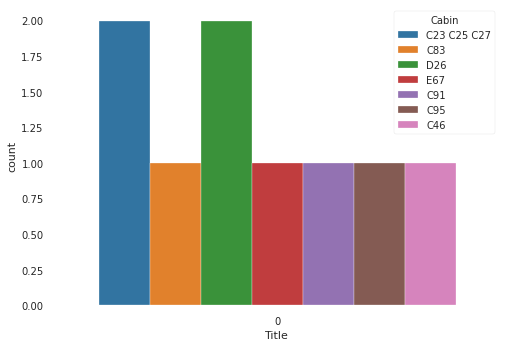

Rich Miss from Southampton who did survive


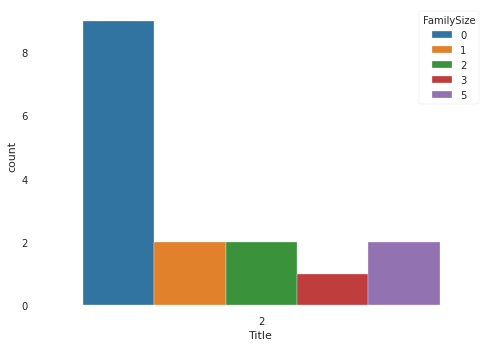

Rich Mrs from Southampton who did survive


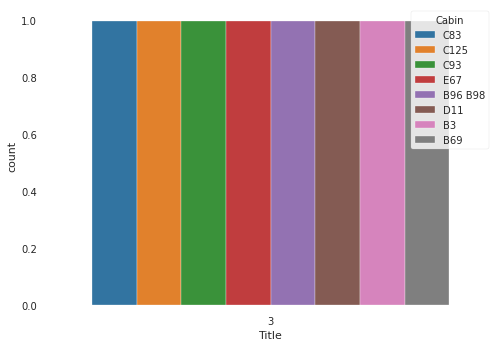

In [21]:
# Fantastic, The significance of data is now clearly amazing, it will help us reach better accuracy
# That's where the ant work starts
# We have to filter out the survivals for each other remaining titles
# We will try to reach 100% accuracy

# Let's start with Southampton and titles 0, 2, 3 (Mr, Miss, Mrs)
# The correct filters are present, because I did them amongst

# Rich men from Southampton who survived seem to have the same characteristics
# They are between 36-38, have family size between 0 and 5 and paid their tickets between 90 - 120
aa = sns.countplot(x='Title', hue='Cabin', data=df.query('Rich==1 & Embarked==0 & Title==0 & Survived==0 & Sex==0'))
print('Rich Mr from Southampton who did survive')
plt.show()

aa = sns.countplot(x='Title', hue='FamilySize', data=df.query('Rich==1 & Embarked==0 & Title==2 & Survived==1 & Sex==1'))
print('Rich Miss from Southampton who did survive')
plt.show()

aa = sns.countplot(x='Title', hue='Cabin', data=df.query('Rich==1 & Embarked==0 & Title==3 & Survived==1 & Sex==1'))
print('Rich Mrs from Southampton who did survive')
plt.show()

Rich Mr from Cherbourg who did survive


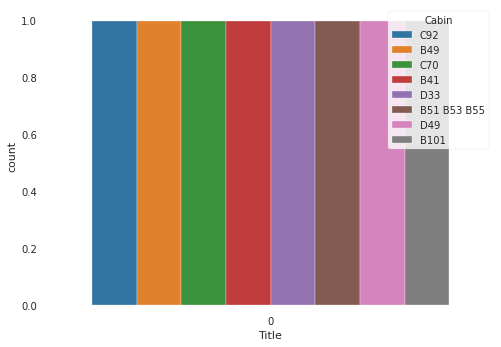

In [22]:
# We repeat the same operation for Rich passengers from Cherbourg
# This category only includes titles 0 (Mr)
aa = sns.countplot(x='Title', hue='Cabin', data=df.query('Rich==1 & Embarked==1 & Title==0 & Survived==1 & Sex==0'))
print('Rich Mr from Cherbourg who did survive')
plt.show()

Middle Class Mr from Southampton who did survive


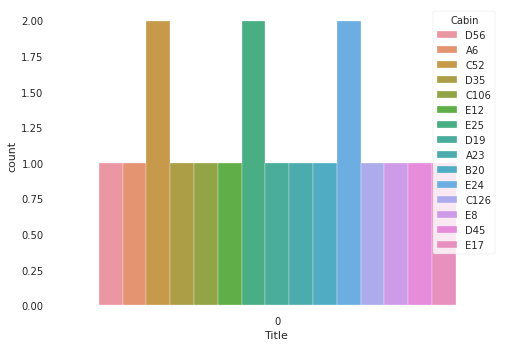

Middle Class Master from Southampton who did survive


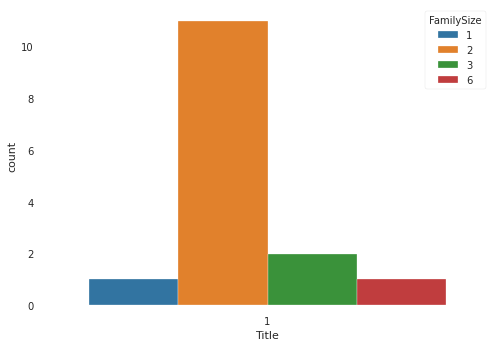

Middle Class Miss from Southampton who did survive


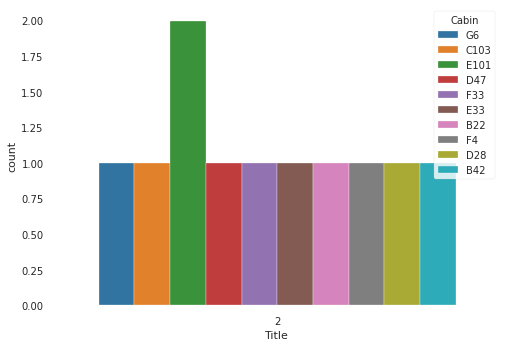

Middle Class Mrs from Southampton who did survive


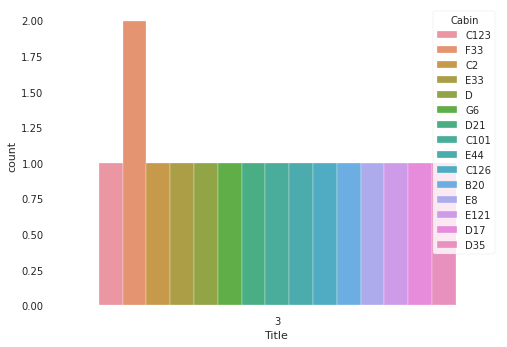

Middle Class Dr from Southampton who did survive


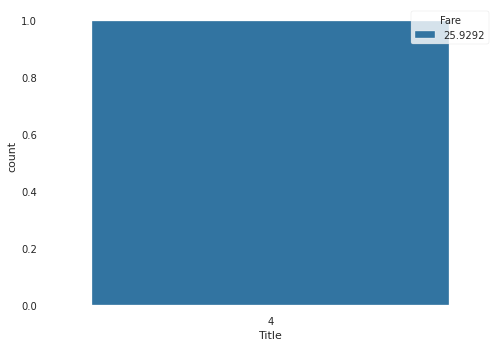

Middle Class Major from Southampton who did survive


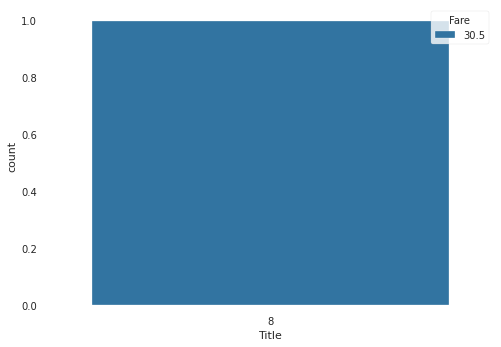

In [23]:
# Same operation with middle class people from Southampton, we are looking for 100% of survival probability
# Categories include titles 0,1,2,3,4,8 (Mr,Master,Miss,Mrs,Dr,Major)
aa = sns.countplot(x='Title', hue='Cabin', data=df.query('MiddleClass==1 & Embarked==0 & Title==0 & Survived==1 & Sex==0 & Parch<=1 & FamilySize<=2'))
print('Middle Class Mr from Southampton who did survive')
plt.show()

# Masters usually have a lot of power towards women, they can be categorized by their family size
aa = sns.countplot(x='Title', hue='FamilySize', data=df.query('MiddleClass==1 & Embarked==0 & Title==1 & Survived==1 & Sex==0'))
print('Middle Class Master from Southampton who did survive')
plt.show()

aa = sns.countplot(x='Title', hue='Cabin', data=df.query('MiddleClass==1 & Embarked==0 & Title==2 & Survived==1 & Sex==1'))
print('Middle Class Miss from Southampton who did survive')
plt.show()

aa = sns.countplot(x='Title', hue='Cabin', data=df.query('MiddleClass==1 & Embarked==0 & Title==3 & Survived==1 & Sex==1'))
print('Middle Class Mrs from Southampton who did survive')
plt.show()

# Doctors have high title, they won't share the same cabin, they may not have the same family size
# But they may be differentiated by the price of their ticket, and their age
aa = sns.countplot(x='Title', hue='Fare', data=df.query('MiddleClass==1 & Embarked==0 & Title==4 & Survived==1'))
print('Middle Class Dr from Southampton who did survive')
plt.show()

# Majors have a high title, they may not share the same cabin, they may not have the same family size nor age
# But they may be differentiated by the price of their ticket
aa = sns.countplot(x='Title', hue='Fare', data=df.query('MiddleClass==1 & Embarked==0 & Title==8 & Survived==1'))
print('Middle Class Major from Southampton who did survive')
plt.show()

Middle Class Mr from Cherbourg who did survive


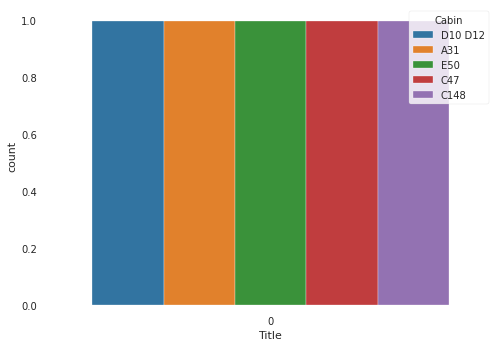

Middle Class Miss from Cherbourg who did survive


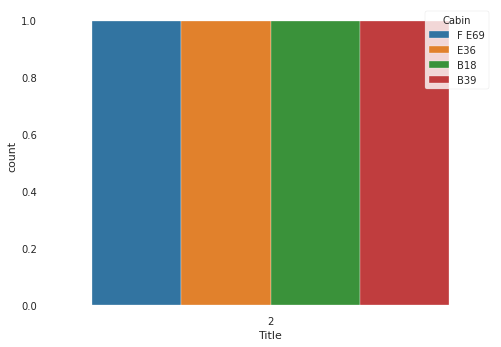

Middle Class Mrs from Cherbourg who did survive


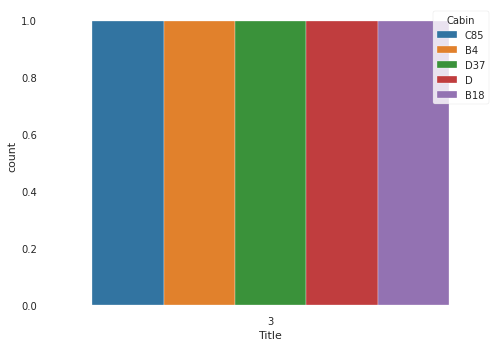

Middle Class Dr from Cherbourg who did survive


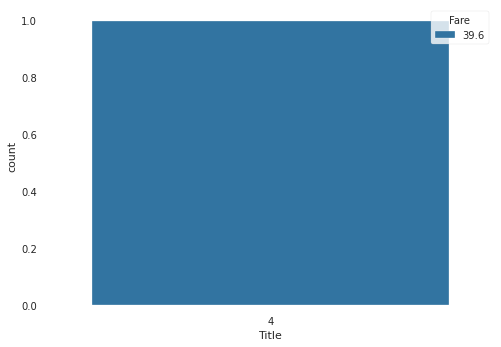

In [24]:
# Same operation with middle class people from Cherbourg, we are looking for 100% of survival probability
# Categories include titles 0,2,3,4 (Mr,Miss,Mrs,Dr)
aa = sns.countplot(x='Title', hue='Cabin', data=df.query('MiddleClass==1 & Embarked==1 & Title==0 & Survived==1 & Sex==0'))
print('Middle Class Mr from Cherbourg who did survive')
plt.show()

aa = sns.countplot(x='Title', hue='Cabin', data=df.query('MiddleClass==1 & Embarked==1 & Title==2 & Survived==1 & Sex==1'))
print('Middle Class Miss from Cherbourg who did survive')
plt.show()

aa = sns.countplot(x='Title', hue='Cabin', data=df.query('MiddleClass==1 & Embarked==1 & Title==3 & Survived==1 & Sex==1'))
print('Middle Class Mrs from Cherbourg who did survive')
plt.show()

# Doctors have high title, they won't share the same cabin, they may not have the same family size
# But they may be differentiated by the price of their ticket, and their age
aa = sns.countplot(x='Title', hue='Fare', data=df.query('MiddleClass==1 & Embarked==1 & Title==4 & Survived==0'))
print('Middle Class Dr from Cherbourg who did survive')
plt.show()

Poor Mr from Southampton who did survive


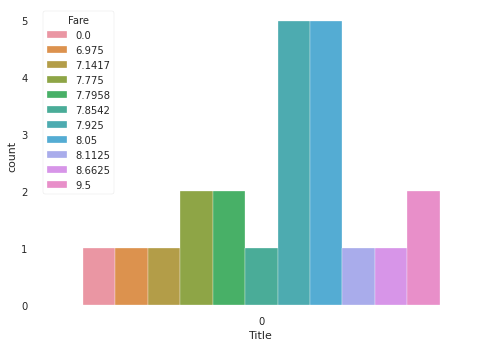

Poor Mrs from Southampton who did survive


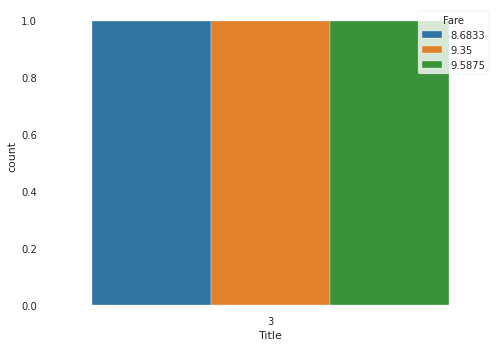

Poor Mr from Cherbourg who did survive


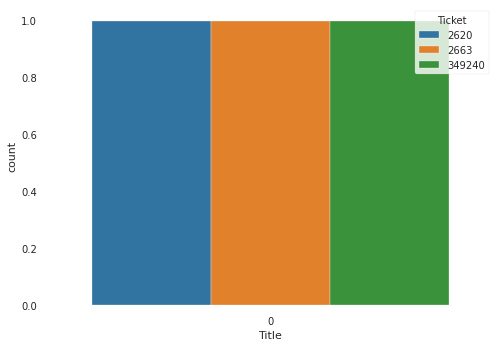

In [25]:
# Same operation with poor people from Southampton, we are looking for 100% of survival probability
# Categories include titles 0,2,3 (Mr,Miss,Mrs)

# The men who survived were not parents
aa = sns.countplot(x='Title', hue='Fare', data=df.query('Poor==1 & Embarked==0 & Title==0 & Survived==1 & Sex==0 & FamilySize<=1 & SibSp<=1 & Parch==0'))
print('Poor Mr from Southampton who did survive')
plt.show()

# Mrs who survived have no Sibling spouse and spent more than 8.6 for their ticket
aa = sns.countplot(x='Title', hue='Fare', data=df.query('Poor==1 & Embarked==0 & Title==3 & Survived==1 & Sex==1 & SibSp==0 & FamilySize>=0'))
print('Poor Mrs from Southampton who did survive')
plt.show()

# We finish with passengers from Cherbourg having title 0 (Mr)
# Mr who survived have between 20-29, familySize=0, and paid their ticket between 7.2 and 7.9
aa = sns.countplot(x='Title', hue='Ticket', data=df.query('Poor==1 & Embarked==1 & Title==0 & Survived==1 & Sex==0 & FamilySize==0 & Age>=20 & Age<=29 & Fare>=7.2 & Fare<=7.9'))
print('Poor Mr from Cherbourg who did survive')
plt.show()

In [26]:
# Next step is to group all our data into the probability column
df = create_probability_category(df)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


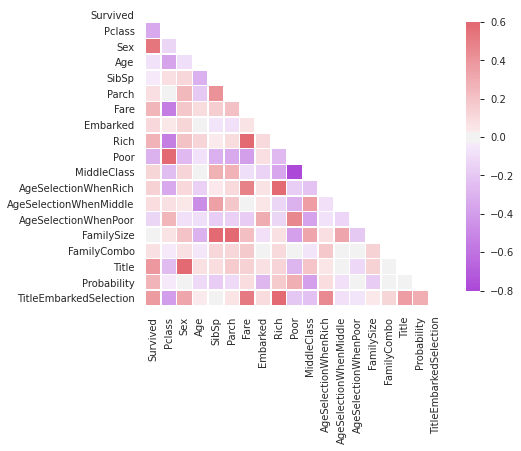

In [27]:
# Here, we categorize the titles accordingly to where they embarked
df = create_titleembarked_category(df)

# Let's check our correlation graph again
correlation_graph(df)

In [28]:
# Wonderful, see the high correlation between TitleEmbarkedSelection and Survival rate?
# Now let's focus on another data we did not experiment and that is Ticket
# We will just see if we can extract something from that
print(df['Ticket'].values)

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '349909' '347077' '2631' '19950' '330959'
 '349216' 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789'
 '2677' 'A./5. 2152' '345764' '2651' '7546' '11668' '349253'
 'SC/Paris 2123' '330958' 'S.C./A.4. 23567' '370371' '14311' '2662'
 '349237' '3101295' 'A/4. 39886' 'PC 17572' '2926' '113509' '19947'
 'C.A. 31026' '2697' 'C.A. 34651' 'CA 2144' '2669' '113572' '36973'
 '347088' 'PC 17605' '2661' 'C.A. 29395' 'S.P. 3464' '3101281' '315151'
 'C.A. 33111' 'CA 2144' 'S.O.C. 14879' '2680' '1601' '348123' '349208'
 '374746' '248738' '364516' '345767' '345779' '330932' '113059'
 'SO/C 14885' '3101278' 'W./C. 6608' 'SOTON/OQ 392086' '19950' '343275'
 '343276' '347466' 'W.E.P. 5734' 'C.A. 2315' '364500' '374910' 'PC 17754'
 'PC 17759' '231919' '244367' 

In [29]:
# What I observe is we have various categories of tickets:
#  1. Tickets with numbers only, from 3 digits to 7
#  2. Tickets with letters
# Maybe we can be successfull categorizing them, let's see
df = create_ticketcategory_category(df)

print(df['TicketCategory'].values)

[17 19  5  1  1  1  2  1  1  1 13  1 17  1  1  1  1  1  1  3  1  1  1  1
  1  1  3  2  1  1 19 19  1  9 19  1  3 24  1  3  3  2  1 21  1 31  1  2
  3  1  0 18 19  3  1  2  9  3  9 15  3  1  2  1 19  3  9 30  0  1  9 15
 28  3  3  1  1  1  1  1  1  1  1  1 20  0 14 20  2  1  1  1 29  9  1  1
 19 19  1  1  1  1  2  3  0  1  1  1  1  1  1  3  1  3  3  5  1  2 19  1
 28 33  1  2  2  3  1 19  3  1  1 20 17  1  9 21  2  1  3 19  3  1  5  1
  1  9  1 14  1  1 34  1 25 17 26 19  2 20  1 15  1  9  1  1  0  1  1  1
 19  3  1  1  1  5  2  1  3 19  1  8 15 21  1  1  1  1  1  1  1  1  1  2
  1  1 19 19  1  3  1  1  1 15  0  3 17  1  0  3  1  1 20 23 17  1  1  2
  5  1  2 19 20  1  2  1  2 13 13 17  1  3  2  1  1  1  9 14  2  9  2 21
  3  1 14  5  3  2  1  1  2  1  1  1  1 17  1  3 19  1 19  1  1  1  1  1
  1  9  0  1 19 19  1  8  1 19  1  2  1  1  1  9  1  1  1 17  1  1  1  1
  1  1  2  2 21  1  1 19  3  1  2 19  3  1  8  1 17  1  2 19 13 19  2 19
  1  1 23  1  1  2  2  2 17  1  1  1 15 19  1  2  1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Relation between Ticket category and survival rate


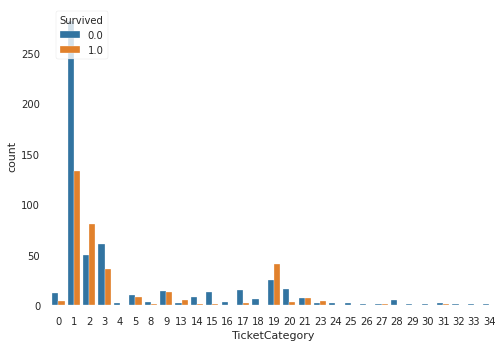

In [30]:
# Let's compare the ticket type with survival rate and see if we can spot a correlation
aa = sns.countplot(x='TicketCategory', hue='Survived', data=df)
print('Relation between Ticket category and survival rate')
plt.show()

Relation between Ticket category from rich passengers and survival rate


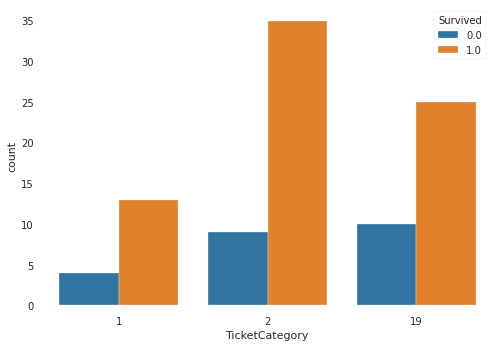

Relation between Ticket category from middle class passengers and survival rate


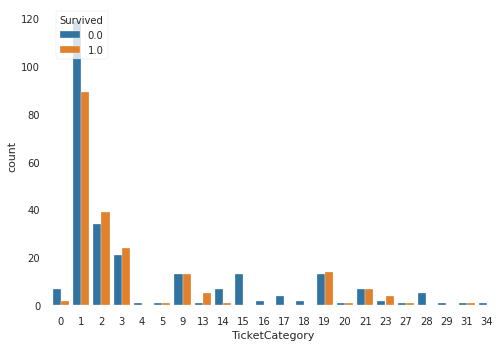

Relation between Ticket category from poor passengers and survival rate


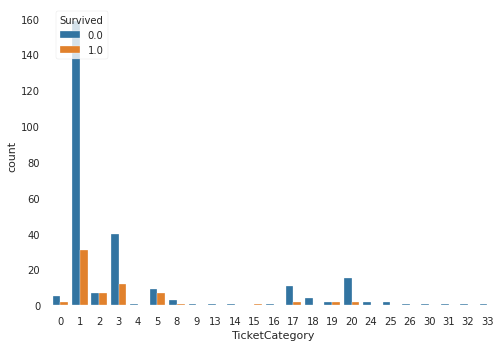

In [31]:
# It seems like with a six digit ticket number, you have the lowest chances to survive
# In the opposite, with a ticket number starting with "C ", your chances to survive are higher 
# But it's not enough, let's try to categorize them by social layer
aa = sns.countplot(x='TicketCategory', hue='Survived', data=df.query('Rich==1'))
print('Relation between Ticket category from rich passengers and survival rate')
plt.show()
aa = sns.countplot(x='TicketCategory', hue='Survived', data=df.query('MiddleClass==1'))
print('Relation between Ticket category from middle class passengers and survival rate')
plt.show()
aa = sns.countplot(x='TicketCategory', hue='Survived', data=df.query('Poor==1'))
print('Relation between Ticket category from poor passengers and survival rate')
plt.show()

Cabins hosting families composed of two members whom one died


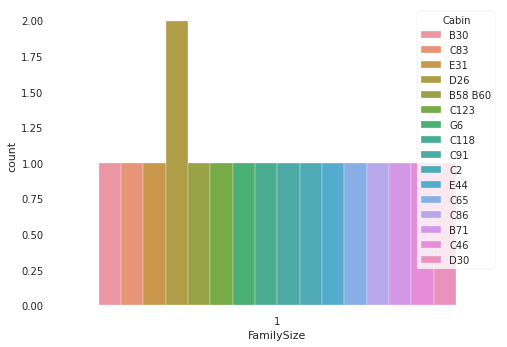

Cabins with members composed of two whom one survived


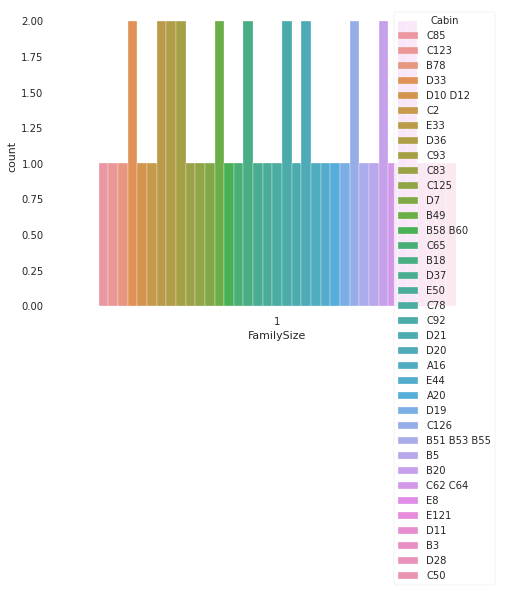

In [32]:
# I would like to see if some cabins hosting families help to predict the test dataset with accuracy
# Maybe in the remaining test dataset, some family members will fall in this category
# NB: FamilySize contains the declared SibSp, ParCh without the sole member, so real FamilySize=FamilySize+1

# We start with family members composed of two, with one person who died
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==0 & FamilySize==1'))
print('Cabins hosting families composed of two members whom one died')
plt.show()

# Let's get cabins with members composed of two whom one survived
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==1 & FamilySize==1'))
print('Cabins with members composed of two whom one survived')
plt.show()

Cabins hosting families composed of three members whom one died


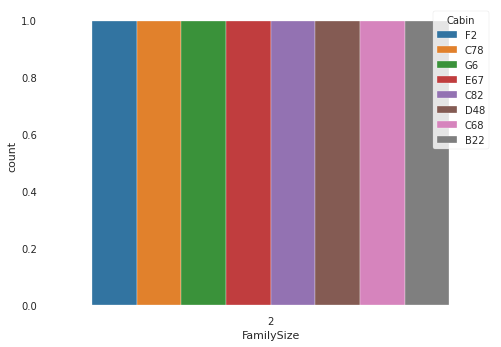

Cabins with members composed of three whom one survived


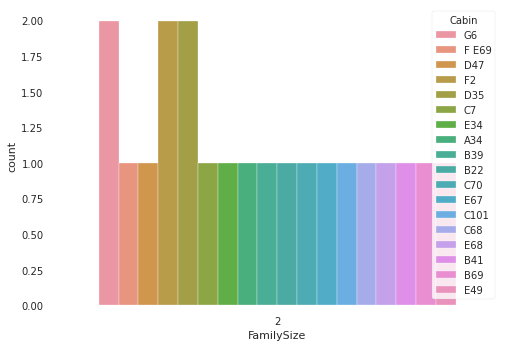

In [33]:
# We start with family members composed of three, with at least one person who died
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==0 & FamilySize==2'))
print('Cabins hosting families composed of three members whom one died')
plt.show()

# Let's get cabins with members composed of three whom one survived
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==1 & FamilySize==2'))
print('Cabins with members composed of three whom one survived')
plt.show()

Cabins with members composed of three who died


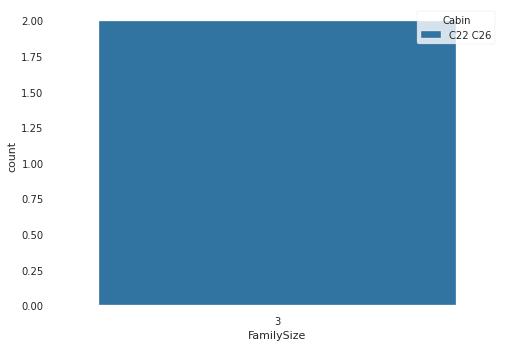

Cabins with members composed of three who survived


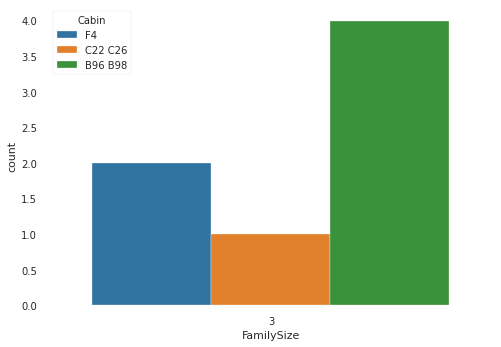

In [34]:

# Let's get cabins with members composed of three with dead guys
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==0 & FamilySize==3'))
print('Cabins with members composed of three who died')
plt.show()

# Let's get cabins with members composed of three with survivals
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==1 & FamilySize==3'))
print('Cabins with members composed of three who survived')
plt.show()

Cabins with members composed of four and more who died


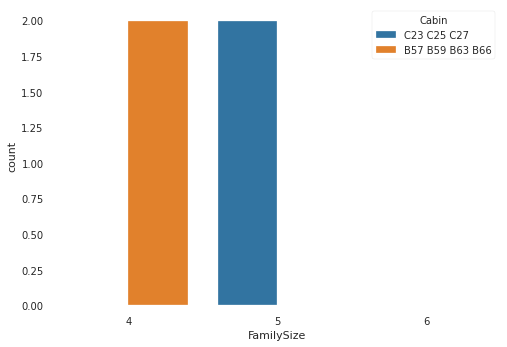

Cabins with members composed of four and more who survived


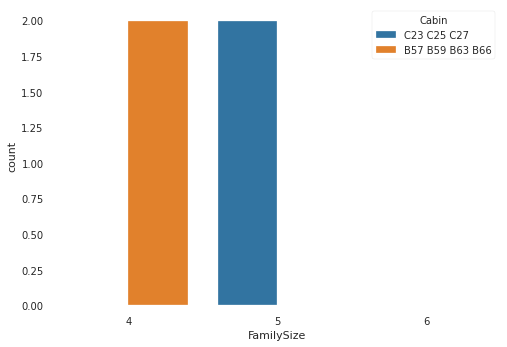

In [35]:
# Let's get cabins with members composed of four and more who died
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==1 & FamilySize>=4'))
print('Cabins with members composed of four and more who died')
plt.show()

# Let's get cabins with members composed of four and more with survivals
aa = sns.countplot(x='FamilySize', hue='Cabin', data=df.query('Survived==1 & FamilySize>=4'))
print('Cabins with members composed of four and more who survived')
plt.show()

In [36]:
# We have nothing to collect from families with four members and more, they are all in the train dataset

# From FamilySize==2 If we take the cabins from the second list that are not in the second, we will know the remaining people in the test dataset died
# UnLuckyPassengersOfTwoSizeFamily = (data['FamilySize']==2) & ((data['Cabin']=='F E69') | (data['Cabin']=='D47') | (data['Cabin']=='D35') | (data['Cabin']=='C7') | (data['Cabin']=='E34') | (data['Cabin']=='A34') | (data['Cabin']=='B39') | (data['Cabin']=='C70') | (data['Cabin']=='C101') | (data['Cabin']=='E68') | (data['Cabin']=='B41') | (data['Cabin']=='B69') | (data['Cabin']=='E49'))
# data.loc[UnLuckyPassengersOfTwoSizeFamily, 'Probability'] = 0

# From FamilySize==3, we can spot that a passenger from Cabin F4 is remaining and is dead, he is in the test dataset
# UnLuckyPassengersOfThreeSizeFamily = (data['FamilySize']==3) & (data['Cabin']=='F4')
# data.loc[UnLuckyPassengersOfTwoSizeFamily, 'Probability'] = 0
    


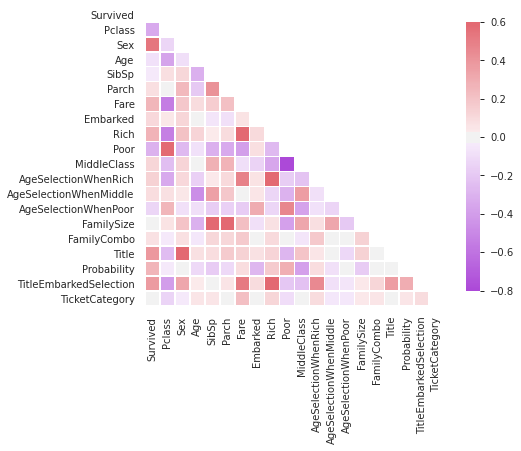

In [37]:
# Again, no real way to spot a clear trend, let's see what our correlation graph tells us
correlation_graph(df)

In [38]:
# Correlation is very low with survival rate
# But now, we have enough data to train our algorythm
# First, we remove columns with no correlation and that does not contains numbers
df = drop_remaining_irrelevant_columns(df)
print(df)

     Survived  Pclass                                               Name  Sex  \
0         0.0       3                            Braund, Mr. Owen Harris    0   
1         1.0       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1.0       3                             Heikkinen, Miss. Laina    1   
3         1.0       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0.0       3                           Allen, Mr. William Henry    0   
..        ...     ...                                                ...  ...   
886       0.0       2                              Montvila, Rev. Juozas    0   
887       1.0       1                       Graham, Miss. Margaret Edith    1   
888       0.0       3           Johnston, Miss. Catherine Helen "Carrie"    1   
889       1.0       1                              Behr, Mr. Karl Howell    0   
890       0.0       3                                Dooley, Mr. Patrick    0   

      Age  SibSp  Parch    

In [45]:
# GREAT !!!, now time to predict our results
Predict = autoMlPredict(df[:891], 0.10)

Create directory AutoML_23
AutoML task to be solved: binary_classification
AutoML will use algorithms: ['CatBoost']
AutoML will optimize for metric: logloss
1_Default_CatBoost final logloss 0.29936946132524955 time 0.97 seconds
90
    Predicted  Survived     Score
0           1       1.0  0.922222
1           0       0.0  0.922222
2           0       0.0  0.922222
3           0       0.0  0.922222
4           0       0.0  0.922222
..        ...       ...       ...
85          0       0.0  0.922222
86          1       1.0  0.922222
87          0       0.0  0.922222
88          1       1.0  0.922222
89          0       0.0  0.922222

[90 rows x 3 columns]
Test MSE: 0.07777777777777778


In [42]:
# We predict with 0.92% accuracy and 0.08% mean square error on our own train dataset

# Now let's add the test dataset
df_test = dataset[892:]
df_test = process_data(df_test)

train_size = len(df)
test_size = len(df_test)
total_size = len(dataset)

test_size_percentage = test_size/total_size

# Reload the prediction with test dataset
print(test_size_percentage)
# new_df.to_csv('./tessst.csv', index=False)
Predict = autoMlPredict(dataset, test_size_percentage)

# It does not mean, the predictions are 100% accurate on the test dataset
# Let's save our predictions first, we are going to add now our test to the train dataset for final prediction
# save_predictions(Predict, './submission.csv')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user

0.31856378915202443
Create directory AutoML_20
AutoML task to be solved: binary_classification
AutoML will use algorithms: ['CatBoost']
AutoML will optimize for metric: logloss
1_Default_CatBoost final logloss 0.39636657946671167 time 0.72 seconds


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').